# Set Up

In [486]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

pd.options.display.max_columns = 999

In [487]:
training = pd.read_csv('./original_data/train.csv')

In [488]:
training.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [489]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [490]:
testing = pd.read_csv('./original_data/test.csv')

In [491]:
testing.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD


In [492]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

# Preliminary EDA

In [493]:
training['Yr Sold'].value_counts()

2007    498
2009    446
2006    438
2008    435
2010    234
Name: Yr Sold, dtype: int64

In [494]:
training['Bldg Type'].value_counts()

1Fam      1700
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: Bldg Type, dtype: int64

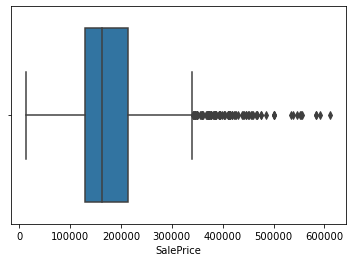

In [495]:
sns.boxplot(x=training['SalePrice']);

In [496]:
training['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

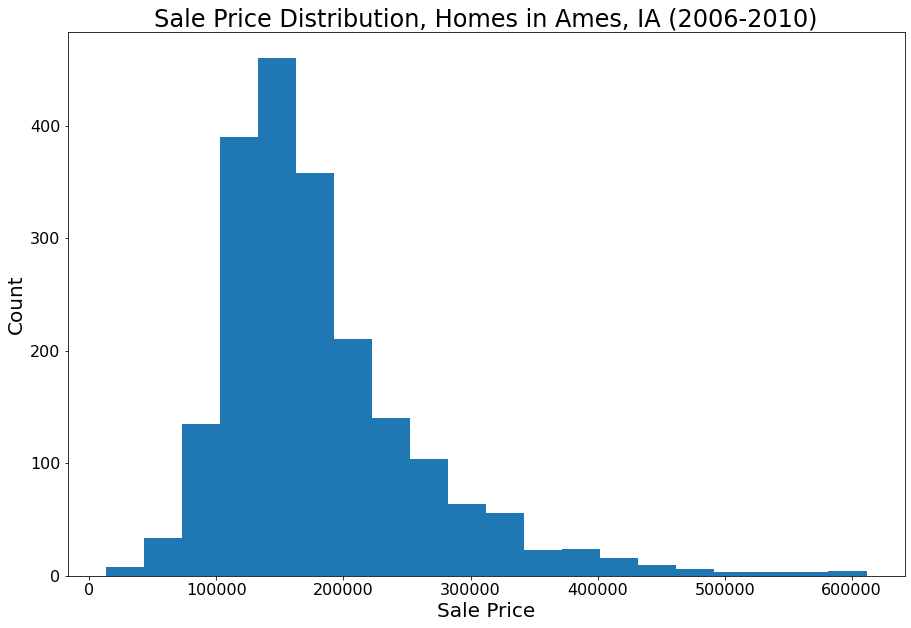

In [497]:
plt.figure(figsize=(15, 10))
plt.hist(training['SalePrice'], bins=20)
plt.title('Sale Price Distribution, Homes in Ames, IA (2006-2010)', fontsize=24)
plt.xlabel('Sale Price', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

The above distribution of home sale prices in Ames, IA is a little right-skewed with outliers on the expensive side of house prices.

In [498]:
training_corr = training.corr().round(3).tail(1).transpose().sort_values(by='SalePrice', ascending=False)
training_corr2 = training_corr.head(13)
training_corr2

,SalePrice
SalePrice,1.000
Overall Qual,0.800
Gr Liv Area,0.697
Garage Area,0.650
Garage Cars,0.648
Total Bsmt SF,0.629
1st Flr SF,0.618
Year Built,0.572
Year Remod/Add,0.550
Full Bath,0.538


The above correlation chart shows us the most highly correlated variables with Sale Price. I'll review this list later on to determine which varaibles I want to use in my model(s).

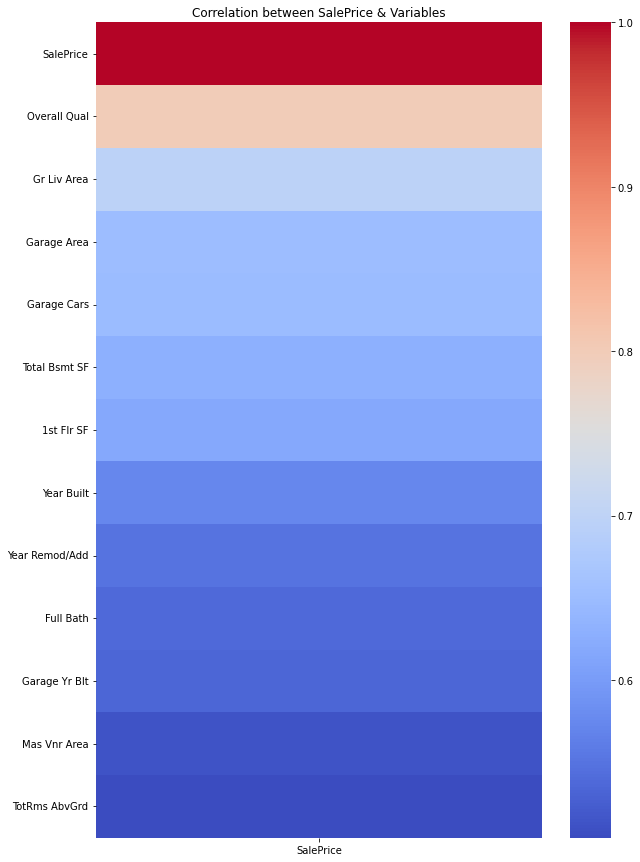

In [499]:
plt.figure(figsize = (10,15))
sns.heatmap(training_corr2, cmap='coolwarm')
plt.title('Correlation between SalePrice & Variables');

The above heatmap shows the same data as the correlation chart before it.

# Train Test Split

In [500]:
X = training.drop(columns='SalePrice')
y = training['SalePrice']

In [501]:
print(X.shape, y.shape)

(2051, 80) (2051,)


In [502]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=333)

In [503]:
print(X_train.shape, y_train.shape)

(1538, 80) (1538,)


# EDA

In [504]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1538 entries, 149 to 1804
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1538 non-null   int64  
 1   PID              1538 non-null   int64  
 2   MS SubClass      1538 non-null   int64  
 3   MS Zoning        1538 non-null   object 
 4   Lot Frontage     1295 non-null   float64
 5   Lot Area         1538 non-null   int64  
 6   Street           1538 non-null   object 
 7   Alley            104 non-null    object 
 8   Lot Shape        1538 non-null   object 
 9   Land Contour     1538 non-null   object 
 10  Utilities        1538 non-null   object 
 11  Lot Config       1538 non-null   object 
 12  Land Slope       1538 non-null   object 
 13  Neighborhood     1538 non-null   object 
 14  Condition 1      1538 non-null   object 
 15  Condition 2      1538 non-null   object 
 16  Bldg Type        1538 non-null   object 
 17  House Style 

In [505]:
X_train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,1538.000000,1.538000e+03,1538.000000,1295.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1523.000000,1537.00000,1537.000000,1537.000000,1537.000000,1538.000000,1538.000000,1538.000000,1538.000000,1536.000000,1536.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1453.000000,1537.000000,1537.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,1490.438882,7.132285e+08,57.438231,68.765251,10120.512354,6.082575,5.571521,1971.146944,1983.910273,99.225213,440.15810,48.057254,562.057905,1050.273260,1155.622237,332.278934,5.091027,1492.992198,0.423828,0.065755,1.571521,0.363459,2.842003,1.042263,6.420026,0.599480,1978.112870,1.763826,469.573195,91.225618,47.113784,23.057217,1.926528,16.793238,2.569571,44.147594,6.242523,2007.750975
std,846.283372,1.885980e+08,43.157778,23.448398,7181.955543,1.394877,1.090156,30.076272,21.083556,171.858382,452.02266,162.977857,439.930598,435.992081,382.697386,427.111028,44.575999,493.774190,0.521266,0.255696,0.545063,0.501025,0.812479,0.207618,1.547063,0.644924,25.728792,0.759175,212.261189,125.341415,66.049828,59.767686,20.405593,56.975427,38.947031,472.146680,2.735884,1.310491
min,3.000000,5.263020e+08,20.000000,21.000000,1470.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.00000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1896.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,767.250000,5.284806e+08,20.000000,57.000000,7500.000000,5.000000,5.000000,1953.000000,1964.000000,0.000000,0.00000,0.000000,216.000000,794.000000,879.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,315.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1500.000000,5.354526e+08,50.000000,68.000000,9377.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,378.00000,0.000000,470.000000,988.000000,1088.000000,0.000000,0.000000,1447.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2213.500000,9.071751e+08,70.000000,80.000000,11523.250000,7.000000,6.000000,2000.000000,2003.750000,160.500000,732.00000,0.000000,809.000000,1306.000000,1382.250000,703.500000,0.000000,1724.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,165.750000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,5644.00000,1474.000000,2153.000000,6110.000000,4692.000000,1862.000000,697.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,6.000000,3.000000,12.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,364.000000,407.000000,490.000000,800.000000,12500.000000,12.000000,2010.000000


# Cleaning Data

In [506]:
def cleaning(X_variable):
    X_clean = X_variable.select_dtypes(exclude=['object']).drop(columns=['Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area']).fillna(0)
    return X_clean

# CITATION: Referenced the top Stack Overflow answer from user "roganjosh" to figure out how to drop object datatypes:
# https://stackoverflow.com/questions/48817592/how-to-drop-dataframe-columns-based-on-dtype

In [507]:
X_train_clean = cleaning(X_train)
X_test_clean = cleaning(X_test)
testing_clean = cleaning(testing)

In [508]:
X_train_clean.shape

(1538, 35)

**NOTE:** Zero submit may seem out of place. It is! Submits 1 & 2 were submitted as part of Breakfast Hour. I proceeded with creating submits 3-11 with the understanding that I was not supposed to do a test_train_split because the data was already split for us (train.csv & test.csv - very confusing names). However, I learned in class on 1/18 that this was not the intention behind the data sets, so I then created submit 0, as well as submits 12-14 (at the end of the doc) using train_test_split on the train.csv dataframe. So I apologize for the weirdness that is submits 3-11. I had hoped to be able to redo them before turning in the project. For what it's worth, I used what I learned from toying around with submits 3-11 when I created submits 0, 12, 13, 14.

# Zero Submit

In [509]:
pipe0 = make_pipeline(StandardScaler(), LassoCV(alphas=[.0001, .001, .01, .1, 1, 10]))

In [510]:
pipe0.fit(X_train_clean, y_train)

/Users/morganhofmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1151757132.1381836, tolerance: 710558467.6302154
  model = cd_fast.enet_coordinate_descent_gram(
/Users/morganhofmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 951225850.333374, tolerance: 710558467.6302154
  model = cd_fast.enet_coordinate_descent_gram(
/Users/morganhofmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 931263596.7570801, tolerance: 710558467.6302154
  model = cd_fast.enet_coordinate_descent_gram(
/Users/morganhofmann/opt/anaconda3

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lassocv', LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10]))])

In [511]:
y_preds0 = pipe0.predict(X_test_clean)

In [512]:
print('training score: ', pipe0.score(X_train_clean, y_train).round(4), ' and testing score: ', pipe0.score(X_test_clean, y_preds0).round(4))
print('MAE: ', mean_absolute_error(y_test, y_preds0))
print('MSE: ', mean_squared_error(y_test, y_preds0, squared=False))

training score:  0.8344  and testing score:  1.0
MAE:  22428.798081766083
MSE:  39624.30147751369


In [513]:
preds0 = pipe0.predict(testing_clean)

In [514]:
testing['SalePrice'] = preds0

In [515]:
testing[['Id', 'SalePrice']].to_csv('./submits/zeroth_submit.csv', index=False)

# First Submit - Baseline Model

In [516]:
y_train1 = training['SalePrice'].mean()

In [517]:
testing['SalePrice'] = y_train1

In [518]:
testing.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD,181469.701609
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,181469.701609
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,181469.701609
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD,181469.701609
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD,181469.701609


In [519]:
testing[['Id', 'SalePrice']].to_csv('./submits/first_submit.csv', index=False)

# Second Submit

In [520]:
linreg = LinearRegression()

In [521]:
X_train2 = training[['Gr Liv Area']]
y_train2 = training['SalePrice']

In [522]:
linreg.fit(X_train2, y_train2)

LinearRegression()

In [523]:
preds2 = linreg.predict(testing[['Gr Liv Area']])

In [524]:
testing['SalePrice'] = preds2

In [525]:
testing[['Id', 'SalePrice']].to_csv('./submits/second_submit.csv', index=False)

In [526]:
linreg.score(X_train2, y_train2)
# training score

0.4858625928400594

In [527]:
linreg.score(testing[['Gr Liv Area']], preds2)
# testing score

1.0

Training score @ 49% & testing score @ 100%  

# Third Submit

In [528]:
training['Lot Area'].sort_values(ascending=False).value_counts()

9600     34
7200     27
6000     26
10800    19
9000     18
         ..
11143     1
11175     1
11194     1
11198     1
1300      1
Name: Lot Area, Length: 1476, dtype: int64

In [529]:
X_train3 = training[['Year Remod/Add', 'Overall Cond', 'Overall Qual', 'Lot Area', 'Gr Liv Area', 'Bedroom AbvGr', 'Full Bath']]
y_train3 = training['SalePrice']

In [530]:
linreg.fit(X_train3, y_train3)

LinearRegression()

In [531]:
preds3 = linreg.predict(testing[['Year Remod/Add', 'Overall Cond', 'Overall Qual', 'Lot Area', 'Gr Liv Area', 'Bedroom AbvGr', 'Full Bath']])

In [532]:
testing['SalePrice'] = preds3

In [533]:
testing[['Id', 'SalePrice']].to_csv('./submits/third_submit.csv', index=False)

In [534]:
linreg.score(X_train3, y_train3)
# training score

0.7608850002014034

In [535]:
linreg.score(testing[['Year Remod/Add', 'Overall Cond', 'Overall Qual', 'Lot Area', 'Gr Liv Area', 'Bedroom AbvGr', 'Full Bath']], preds3)
# testing score

1.0

Training score @ 76% & testing score @ 100% for the above

# Fourth Submit

In [536]:
ss = StandardScaler()
logreg = LogisticRegression(max_iter=10_000)

In [537]:
X_train4 = training[['Year Remod/Add', 'Overall Cond', 'Overall Qual', 'Lot Area', 'Gr Liv Area', 'Bedroom AbvGr', 'Full Bath']]
y_train4 = training['SalePrice']

In [538]:
X_train4_ss = ss.fit_transform(X_train4)

In [539]:
X_test4_ss = ss.transform(testing[['Year Remod/Add', 'Overall Cond', 'Overall Qual', 'Lot Area', 'Gr Liv Area', 'Bedroom AbvGr', 'Full Bath']])

In [540]:
logreg.fit(X_train4_ss, y_train4)

LogisticRegression(max_iter=10000)

In [541]:
preds4 = logreg.predict(X_test4_ss)

In [542]:
testing['SalePrice'] = preds4

In [543]:
testing[['Id', 'SalePrice']].to_csv('./submits/fourth_submit.csv', index=False)

In [544]:
linreg.score(X_train4, y_train4)
# training score

0.7608850002014034

In [545]:
linreg.score(X_test4_ss, preds4)
# testing score

/Users/morganhofmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-434.58293651745004

This one is worse than submit 3 - submit 3 is the best so far. This submission doesn't do well because I used LogisticRegression, which isn't appropriate for this dataset (in retrospect).

# Fifth Submit

In [546]:
X_train5 = training[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath', 'TotRms AbvGrd']].fillna(0)
y_train5 = training['SalePrice']


In [547]:
linreg.fit(X_train5, y_train5)

LinearRegression()

In [548]:
preds5 = linreg.predict(testing[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath', 'TotRms AbvGrd']])

In [549]:
testing['SalePrice'] = preds5


In [550]:
testing[['Id', 'SalePrice']].to_csv('./submits/fifth_submit.csv', index=False)


In [551]:
print(linreg.score(X_train5, y_train5))
# training score

print(linreg.score(testing[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath', 'TotRms AbvGrd']], preds5))
# testing score

print(mean_absolute_error(testing['SalePrice'], preds5))
print(mean_squared_error(testing['SalePrice'], preds5, squared=False))

0.7872442067148951
1.0
0.0
0.0


Training score @ 78% & testing score @ 100%

# Sixth Submit

In [552]:
X_train6 = training[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath', 'TotRms AbvGrd']].fillna(0)
y_train6 = training['SalePrice']

In [553]:
ridge = RidgeCV(alphas=[.0001, .001, .01, .1, 1, 10])

In [554]:
ridge.fit(X_train6, y_train6)

RidgeCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]))

In [555]:
preds6 = ridge.predict(testing[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath', 'TotRms AbvGrd']])

In [556]:
testing['SalePrice'] = preds6

In [557]:
testing[['Id', 'SalePrice']].to_csv('./submits/sixth_submit.csv', index=False)

In [558]:
print(ridge.score(X_train6, y_train6))
# training score

print(ridge.score(testing[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath', 'TotRms AbvGrd']], preds6))
# testing score

print(mean_absolute_error(testing['SalePrice'], preds6))
print(mean_squared_error(testing['SalePrice'], preds6, squared=False))

0.7872413574864497
1.0
0.0
0.0


The above submission is the best so far.

# Seventh Submit

In [559]:
X_train7 = training.select_dtypes(exclude=['object']).drop(columns=['SalePrice', 'Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area']).fillna(0)
y_train7 = training['SalePrice']

In [560]:
X_train7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   Lot Area         2051 non-null   int64  
 4   Overall Qual     2051 non-null   int64  
 5   Overall Cond     2051 non-null   int64  
 6   Year Built       2051 non-null   int64  
 7   Year Remod/Add   2051 non-null   int64  
 8   BsmtFin SF 1     2051 non-null   float64
 9   BsmtFin SF 2     2051 non-null   float64
 10  Bsmt Unf SF      2051 non-null   float64
 11  Total Bsmt SF    2051 non-null   float64
 12  1st Flr SF       2051 non-null   int64  
 13  2nd Flr SF       2051 non-null   int64  
 14  Low Qual Fin SF  2051 non-null   int64  
 15  Gr Liv Area      2051 non-null   int64  
 16  Bsmt Full Bath   2051 non-null   float64
 17  Bsmt Half Bath

In [561]:
pipe1 = make_pipeline(PolynomialFeatures(), StandardScaler(), RFE(n_features_to_select=.2, estimator=RidgeCV(alphas=[.0001, .001, .01, .1, 1, 10])), LogisticRegression(max_iter=10_000))

In [562]:
pipe1.fit(X_train7, y_train7)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('rfe',
                 RFE(estimator=RidgeCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])),
                     n_features_to_select=0.2)),
                ('logisticregression', LogisticRegression(max_iter=10000))])

In [563]:
preds7 = pipe1.predict(testing.select_dtypes(exclude=['object']).drop(columns=['SalePrice', 'Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area']).fillna(0))

In [564]:
testing['SalePrice'] = preds7

In [565]:
testing[['Id', 'SalePrice']].to_csv('./submits/seventh_submit.csv', index=False)

In [566]:
print(pipe1.score(X_train7, y_train7))
# training score

print(pipe1.score(testing.select_dtypes(exclude=['object']).drop(columns=['SalePrice', 'Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area']).fillna(0), preds7))
# testing score

print(mean_absolute_error(testing['SalePrice'], preds7))
print(mean_squared_error(testing['SalePrice'], preds7, squared=False))

0.757679180887372
1.0
0.0
0.0


# Eighth Submit

In [567]:
pipe2 = make_pipeline(StandardScaler(), RFE(n_features_to_select=.5, estimator=LogisticRegression(max_iter=1_000)), RidgeCV(alphas=[.0001, .001, .01, .1, 1, 10]))

In [568]:
pipe2.fit(X_train7, y_train7)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('rfe',
                 RFE(estimator=LogisticRegression(max_iter=1000),
                     n_features_to_select=0.5)),
                ('ridgecv',
                 RidgeCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])))])

In [569]:
preds8 = pipe2.predict(testing.select_dtypes(exclude=['object']).drop(columns=['SalePrice', 'Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area']).fillna(0))

In [570]:
testing['SalePrice'] = preds8

In [571]:
testing[['Id', 'SalePrice']].to_csv('./submits/eighth_submit.csv', index=False)

In [572]:
print(pipe2.score(X_train7, y_train7))
# training score

print(pipe2.score(testing.select_dtypes(exclude=['object']).drop(columns=['SalePrice', 'Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area']).fillna(0), preds8))
# testing score

print(mean_absolute_error(testing['SalePrice'], preds8))
print(mean_squared_error(testing['SalePrice'], preds8, squared=False))

0.7968890382094593
1.0
0.0
0.0


# Ninth Submit

In [573]:
pipe3 = make_pipeline(StandardScaler(), RidgeCV(alphas=[.0001, .001, .01, .1, 1, 10]))

In [574]:
pipe3.fit(X_train7, y_train7)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])))])

In [575]:
preds9 = pipe3.predict(testing.select_dtypes(exclude=['object']).drop(columns=['SalePrice', 'Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area']).fillna(0))

In [576]:
testing['SalePrice'] = preds9

In [577]:
testing[['Id', 'SalePrice']].to_csv('./submits/ninth_submit.csv', index=False)

In [578]:
print(pipe3.score(X_train7, y_train7))
# training score

print(pipe3.score(testing.select_dtypes(exclude=['object']).drop(columns=['SalePrice', 'Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area']).fillna(0), preds9))
# testing score

print(mean_absolute_error(testing['SalePrice'], preds9))
print(mean_squared_error(testing['SalePrice'], preds9, squared=False))

0.8337212852710773
1.0
0.0
0.0


The above is the best one yet!

# Tenth Submit

In [579]:
pipe4 = make_pipeline(OneHotEncoder(drop='if_binary', sparse=False, handle_unknown='ignore'), StandardScaler(), RidgeCV(alphas=[.001, .01, .1, 1, 10]))

In [580]:
X_train10 = training[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath', 'TotRms AbvGrd', 'MS Zoning', 'Neighborhood', 'Bldg Type']]
y_train10 = training['SalePrice']

In [581]:
X_train10.shape

(2051, 11)

In [582]:
pipe4.fit(X_train10, y_train10)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(drop='if_binary', handle_unknown='ignore',
                               sparse=False)),
                ('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])))])

In [583]:
preds10 = pipe4.predict(testing[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath', 'TotRms AbvGrd', 'MS Zoning', 'Neighborhood', 'Bldg Type']])

/Users/morganhofmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [1, 2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [584]:
testing['SalePrice'] = preds10

In [585]:
testing[['Id', 'SalePrice']].to_csv('./submits/tenth_submit.csv', index=False)

In [586]:
print(pipe4.score(X_train10, y_train10))
# training score

print(pipe4.score(testing[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath', 'TotRms AbvGrd', 'MS Zoning', 'Neighborhood', 'Bldg Type']], preds10))
# testing score

print(mean_absolute_error(testing['SalePrice'], preds10))
print(mean_squared_error(testing['SalePrice'], preds10, squared=False))

/Users/morganhofmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [1, 2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.9988205868488411
1.0
0.0
0.0


The above performed not-great on Kaggle, but appears to perform really well here. Likely overfitting.

# Eleventh Submit

In [587]:
pipe5 = make_pipeline(OneHotEncoder(drop='if_binary', sparse=False, handle_unknown='ignore'), StandardScaler(), RidgeCV(alphas=[.0001, .001, .01, .1, 1, 10, 100]))

In [588]:
X_train11 = training[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath', 'TotRms AbvGrd', 'MS Zoning', 'Bldg Type']]
y_train11 = training['SalePrice']

In [589]:
X_train11.shape

(2051, 10)

In [590]:
pipe5.fit(X_train11, y_train11)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(drop='if_binary', handle_unknown='ignore',
                               sparse=False)),
                ('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])))])

In [591]:
preds11 = pipe5.predict(testing[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath', 'TotRms AbvGrd', 'MS Zoning', 'Bldg Type']])

/Users/morganhofmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [1, 2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [592]:
testing['SalePrice'] = preds11

In [593]:
testing[['Id', 'SalePrice']].to_csv('./submits/eleventh_submit.csv', index=False)

In [594]:
print(pipe5.score(X_train11, y_train11))
# training score

print(pipe5.score(testing[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath', 'TotRms AbvGrd', 'MS Zoning', 'Bldg Type']], preds11))
# testing score

print(mean_absolute_error(testing['SalePrice'], preds11))
print(mean_squared_error(testing['SalePrice'], preds11, squared=False))

0.9969888647730344
1.0
0.0
0.0


/Users/morganhofmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [1, 2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


The above is similar to submission 10 with regard to model & score.

# Twelfth Submit

In [595]:
pipe12 = make_pipeline(StandardScaler(), RidgeCV(alphas=[.0001, .001, .01, .1, 1, 10]))

In [596]:
pipe12.fit(X_train_clean, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])))])

In [597]:
X_train_clean.shape

(1538, 35)

In [598]:
y_preds12 = pipe12.predict(X_test_clean)

In [599]:
print('training score: ', pipe12.score(X_train_clean, y_train).round(4), ' and testing score: ', pipe12.score(X_test_clean, y_preds12).round(4))
print('MAE: ', mean_absolute_error(y_test, y_preds12))
print('MSE: ', mean_squared_error(y_test, y_preds12, squared=False))

training score:  0.8343  and testing score:  1.0
MAE:  22413.93743996145
MSE:  39617.69721409377


In [600]:
preds12 = pipe12.predict(testing_clean)

In [601]:
testing['SalePrice'] = preds12

In [602]:
testing[['Id', 'SalePrice']].to_csv('./submits/twelfth_submit.csv', index=False)

The above is the same as submit0 but with Ridge - it performs slightly worse in Kaggle than submit0.

# Thirteenth Submit

In [603]:
pipe13 = make_pipeline(StandardScaler(), LinearRegression())

In [604]:
pipe13.fit(X_train_clean, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [605]:
y_preds13 = pipe13.predict(X_test_clean)

In [606]:
print('training score: ', pipe13.score(X_train_clean, y_train).round(4), ' and testing score: ', pipe13.score(X_test_clean, y_preds13).round(4))
print('MAE: ', mean_absolute_error(y_test, y_preds13))
print('MSE: ', mean_squared_error(y_test, y_preds13, squared=False))

training score:  0.8344  and testing score:  1.0
MAE:  22440.531262667937
MSE:  39591.345895331004


In [607]:
preds13 = pipe13.predict(testing_clean)

In [608]:
testing['SalePrice'] = preds13

In [609]:
testing[['Id', 'SalePrice']].to_csv('./submits/thirteenth_submit.csv', index=False)

The above is similar to submit0 & submit12 - it performs slightly worse than both. It seems that the LassoCV model performs slightly better than RidgeCV and LinearRegression.

# Fourteenth Submit

In [610]:
def cleaning14(X_variable):
    X_clean = X_variable[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath', 'TotRms AbvGrd']].fillna(0)
    return X_clean

In [611]:
X_train_clean14 = cleaning14(X_train)
X_test_clean14 = cleaning14(X_test)
testing_clean14 = cleaning14(testing)

In [612]:
X_train_clean14.shape

(1538, 8)

In [613]:
pipe0.fit(X_train_clean14, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lassocv', LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10]))])

In [614]:
y_preds14 = pipe0.predict(X_test_clean14)

In [615]:
print('training score: ', pipe0.score(X_train_clean14, y_train).round(4), ' and testing score: ', pipe0.score(X_test_clean14, y_preds14).round(4))
print('MAE: ', mean_absolute_error(y_test, y_preds14))
print('RMSE: ', mean_squared_error(y_test, y_preds14, squared=False))

training score:  0.7902  and testing score:  1.0
MAE:  25825.118343030153
RMSE:  41571.74988344123


In [616]:
preds14 = pipe0.predict(testing_clean14)

In [617]:
testing['SalePrice'] = preds14

In [618]:
testing[['Id', 'SalePrice']].to_csv('./submits/fourteenth_submit.csv', index=False)

# Analysis of my model & additional EDA & Graphing

In [619]:
pipe0.named_steps['lassocv'].alpha_

10.0

In [620]:
pipe0.named_steps['lassocv'].coef_

array([28822.96807462, 23108.03864631,  9529.83941931,  7529.62137042,
        7036.92165077, 12137.05057542, -2680.32728216,   733.449222  ])

In [621]:
df_coef = pd.DataFrame(zip(pipe0.named_steps['lassocv'].coef_, X_train_clean14.columns))
df_coef.sort_values(by=0, ascending=False)

,0,1
0,28822.968075,Overall Qual
1,23108.038646,Gr Liv Area
5,12137.050575,Year Built
2,9529.839419,Garage Area
3,7529.621370,Total Bsmt SF
4,7036.921651,1st Flr SF
7,733.449222,TotRms AbvGrd
6,-2680.327282,Full Bath


For ease, the above model feels more accessible for a non-technical audience since since it allows us to look at 8 attributes whereas the ones that performed a little better involved 30+ attributes (or were submits 3-11, which were not done with a train_test_split).  
The above model can account for 79% of the variance in the sales prices of homes in Ames, IA. Our baseline can only account for 

If overall quality increases by 1 standard deviation, holding all other variables constant, we expect sale price to increase by $28,823.  
If above grade (ground) living area square feet increases by 1 standard deviation, holding all other variables constant, we expect sale price to increase by $23,108.  
If the year built increases by 1 standard deviation, holding all other variables constant, we expect sale price to increase by $12,137.  
If the garage area increases by 1 standard deviation, holding all other variables constant, we expect sale price to increase by $9,530.  
If the total SF of the basement area increases by 1 standard deviation, holding all other variables constant, we expect sale price to increase by $7,530.    
If the 1st floor SF increases by 1 standard deviation, holding all other variables constant, we expect sale price to increase by $7,036.  
If the total rooms above grade (not including bathrooms) increases by 1 standard deviation, holding all other variables constant, we expect sale price to increase by $733.  
If the total bathrooms above grade increases by 1 standard deviation, holding all other variables constant, we expect sale price to DEcrease by $2,680.

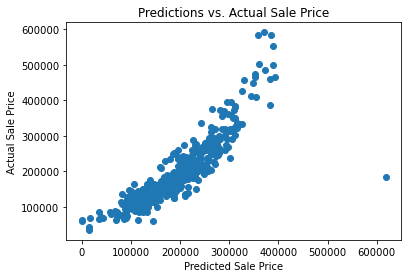

In [622]:
plt.scatter(y_preds14, y_test)
plt.title("Predictions vs. Actual Sale Price")
plt.xlabel('Predicted Sale Price')
plt.ylabel('Actual Sale Price');

Whoops! I should have removed that outlier from the data set.

In [623]:
training['Full Bath'].value_counts()

2    1096
1     900
3      45
0       8
4       2
Name: Full Bath, dtype: int64

In [624]:
training[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath', 'TotRms AbvGrd']].fillna(0).mean()

Overall Qual        6.112140
Gr Liv Area      1499.330083
Garage Area       473.440761
Total Bsmt SF    1057.471965
1st Flr SF       1164.488055
Year Built       1971.708922
Full Bath           1.577279
TotRms AbvGrd       6.435885
dtype: float64

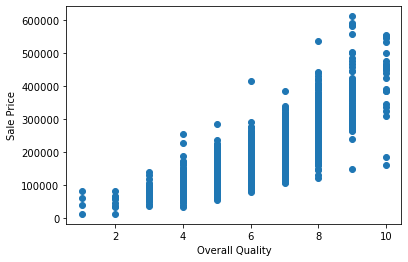

In [625]:
plt.scatter(data=training, x='Overall Qual', y='SalePrice')
plt.ylabel("Sale Price")
plt.xlabel("Overall Quality");

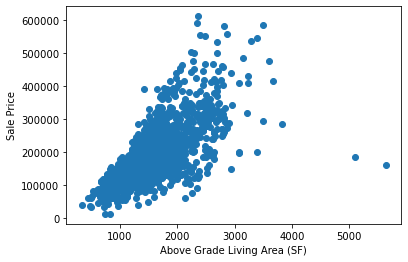

In [626]:
plt.scatter(data=training, x='Gr Liv Area', y='SalePrice')
plt.ylabel("Sale Price")
plt.xlabel("Above Grade Living Area (SF)");

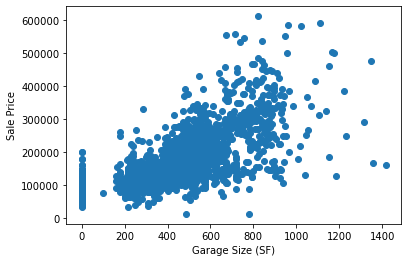

In [627]:
plt.scatter(data=training, x='Garage Area', y='SalePrice')
plt.ylabel("Sale Price")
plt.xlabel("Garage Size (SF)");

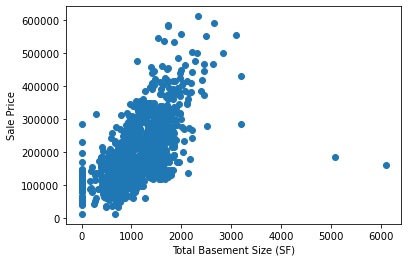

In [628]:
plt.scatter(data=training, x='Total Bsmt SF', y='SalePrice')
plt.ylabel("Sale Price")
plt.xlabel("Total Basement Size (SF)");

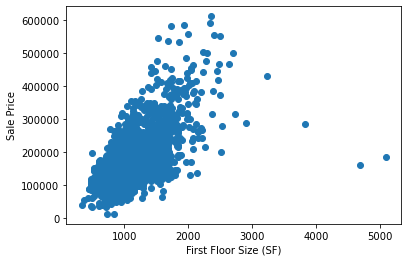

In [629]:
plt.scatter(data=training, x='1st Flr SF', y='SalePrice')
plt.ylabel("Sale Price")
plt.xlabel("First Floor Size (SF)");


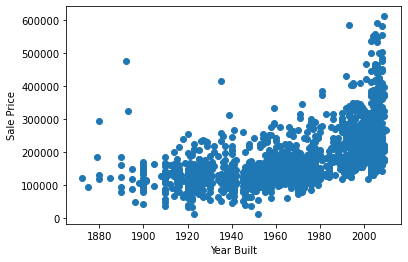

In [630]:
plt.scatter(data=training, x='Year Built', y='SalePrice')
plt.ylabel("Sale Price")
plt.xlabel("Year Built");

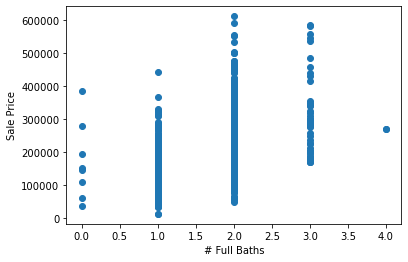

In [631]:
plt.scatter(data=training, x='Full Bath', y='SalePrice')
plt.ylabel("Sale Price")
plt.xlabel("# Full Baths");

# shouldn't be any houses with 0 bathrooms, so this could impact data

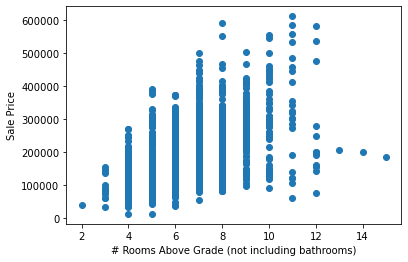

In [632]:
plt.scatter(data=training, x='TotRms AbvGrd', y='SalePrice')
plt.ylabel("Sale Price")
plt.xlabel("# Rooms Above Grade (not including bathrooms)");

In [633]:
training['MS Zoning'].value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64